In [19]:
palette = ['#3B8EA1', '#B84D4A', '#6F5B9A', '#B59F8E', '#D96B9A', '#A3A3A3', '#D88F3B', '#4C9F4A']
from pathlib import Path
variant_scores = Path("..") / "data" / "raw_scores"
single_variants = Path("..") / "data" / "other_data" / "single_variants"
figure = Path("..") / "figures"
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns
import pandas as pd
import numpy as np

In [20]:
def barcode_to_variant(barcode_score, barcode_variant):
    df_score = pd.read_csv(f"{variant_scores}\\{barcode_score}_main_barcodes_scores.tsv", sep='\t').rename(columns={"Unnamed: 0": "barcode"})
    df_score = df_score[["barcode", "score"]]
    df_barvar = pd.read_csv(f"{variant_scores}\\{barcode_var}.csv").rename(columns={"barcode_rev":"barcode", "aa_substitutions": "variant"})
    df_merge = df_barvar.merge(df_score, on="barcode")
    df = df_merge[(df_merge["n_aa_substitutions"] == 1)] #only single mutants for benchmarking
    df = df.groupby('variant').filter(lambda x: len(x) >= 3) #only variants having three barcodes
    return df[["barcode", "variant", "score"]].reset_index(drop=True)

In [21]:
barcode_score = "highADSL-T10"
barcode_var = "highADSL_barcode_variantR"
dfOne = barcode_to_variant(barcode_score, barcode_var)

In [22]:
barcode_stdv = dfOne.groupby('variant')['score'].std().mean()
stdv = dfOne['score'].std()
print(f"value: {round(barcode_stdv/stdv,3)}")

value: 0.522


In [23]:
# Create the DataFrame
df_benchmark = pd.DataFrame({
    "time": [4, 5, 6, 7, 8, 9, 10],
    "low": [0.588, 0.566, 0.563, 0.565, 0.571, 0.578, 0.584],
    "high": [0.514, 0.509, 0.509, 0.507, 0.512, 0.515, 0.522]
})

# Calculate z-scores for 'low' and 'high' columns
df_benchmark['z_low'] = (df_benchmark['low'] - df_benchmark['low'].mean()) / df_benchmark['low'].std()
df_benchmark['z_high'] = (df_benchmark['high'] - df_benchmark['high'].mean()) / df_benchmark['high'].std()

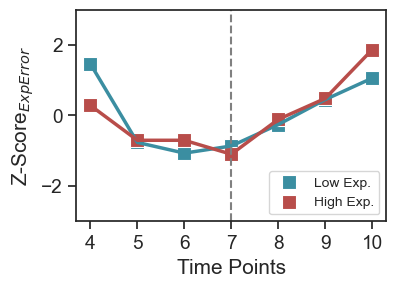

In [24]:
sns.set(font_scale = 1.25, font = "arial", rc={'figure.figsize':(4,2.75)}, style = "ticks")
sns.scatterplot(data=df_benchmark, x="time", y="z_low", color=palette[0], label='Low Exp.', s = 100, marker = "s")
sns.lineplot(data=df_benchmark, x="time", y="z_low", color=palette[0], linewidth = 2.5)
sns.scatterplot(data=df_benchmark, x="time", y="z_high", color=palette[1], label='High Exp.', s = 100, marker = "s")
sns.lineplot(data=df_benchmark, x="time", y="z_high", color=palette[1], linewidth = 2.5)
plt.ylim(-3, 3)
plt.ylabel("Z-Score$_{ExpError}$")
plt.xlabel("Time Points")
plt.xticks([4,5,6,7,8,9,10])
plt.axvline(x=7, color="gray", linestyle='--')
plt.legend(loc = "lower right", fontsize = 10)
#plt.savefig(f"{figure}figure.svg", format = "svg", bbox_inches='tight')
#plt.close()

Text(1.0, 1.0, "Spearman's: 0.92 p<0.05")

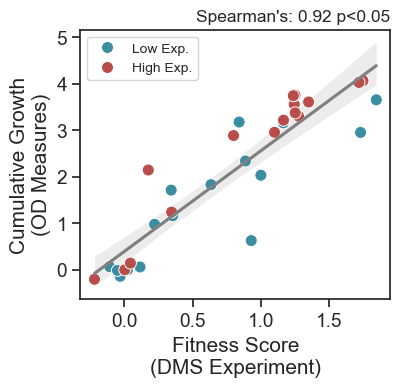

In [25]:
df_linear = pd.read_csv(f"{single_variants}\\single_variants_corr.csv")
r_value, p_value = spearmanr(df_linear["fitness"], df_linear["growth"])
sns.set(font_scale=1.25, font="arial", rc={'figure.figsize': (4, 3.5)}, style="ticks")
sns.regplot(data=df_linear, x="fitness", y="growth", scatter = False, color = "grey")
sns.scatterplot(data=df_linear, x="fitness", y="growth", s = 75, palette = palette[0:2], hue = "library")
plt.ylabel("Cumulative Growth" + "\n" + "(OD Measures)")
plt.xlabel("Fitness Score" + "\n" + "(DMS Experiment)")
plt.legend(title = "", fontsize = 10)
plt.title(f"Spearman's: {round(r_value, 2)} p<0.05", loc = "right", fontsize = 12.5)
#plt.savefig(f"{figure}figure.svg", format = "svg", bbox_inches='tight', transparent=True)
#plt.close()